In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (20,10)

%matplotlib inline

In [2]:
os.listdir('.')

['sensitivity_plot.ipynb',
 'exclusion_version',
 'notebook.tex',
 'changing_kaut',
 'wide_params',
 '.ipynb_checkpoints',
 'sensitivity_plot_hypoxia.ipynb',
 'hypercapnia',
 'dsim.info',
 'Figures',
 'model_io',
 'sensitivities.txt',
 'results.txt',
 'sensitivity_plot_multivar_maxima.ipynb',
 'multivar',
 'sensitivity_plot_hypercapnia.ipynb',
 'dtw',
 'hypoxia',
 'exc_kaut']

## Sensitivities with variable k_aut with healthy data

In [3]:
df_healthy = pd.read_csv('multivar/wide/maxima/healthy/sensitivities.txt', sep='\t')

In [4]:
df_healthy.columns


Index(['Parameter', 'TOTAL_mu', 'TOTAL_mu_star', 'TOTAL_sigma',
       'TOTAL_mu_star_conf', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma',
       'CCO_mu_star_conf', 'TOI_mu', 'TOI_mu_star', 'TOI_sigma',
       'TOI_mu_star_conf', 'CBF_mu', 'CBF_mu_star', 'CBF_sigma',
       'CBF_mu_star_conf'],
      dtype='object')

In [5]:
df_healthy.sort_values(by="TOTAL_mu_star", ascending=False)

,Parameter,TOTAL_mu,TOTAL_mu_star,TOTAL_sigma,TOTAL_mu_star_conf,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf
83,r_0,-2.044512e+11,2.044512e+11,2.044512e+12,4.055000e+11,-3.270621,20.772595,58.480732,10.785800,9.478534,13.939246,66.379451,12.105688,-2.044512e+11,2.044512e+11,2.044512e+12,4.157092e+11
89,r_m,-5.799639e+09,5.799639e+09,5.799639e+10,1.173941e+10,0.635896,28.747841,100.278502,18.538593,-1.513905,4.457684,13.761782,2.491743,-5.799639e+09,5.799639e+09,5.799639e+10,1.143388e+10
72,P_ic,1.112324e+09,1.112324e+09,1.112324e+10,2.083479e+09,2.427703,3.794681,25.567689,4.916360,-3.790816,4.510871,36.746863,7.220208,1.112324e+09,1.112324e+09,1.112324e+10,2.175693e+09
95,sigma_e0,-8.230523e+08,8.230720e+08,8.230623e+09,1.662470e+09,0.863076,2.336693,12.384655,2.296972,-0.011632,0.442465,1.618718,0.308626,-8.230523e+08,8.230720e+08,8.230623e+09,1.596758e+09
100,T_max0,-8.230622e+08,8.230622e+08,8.230622e+09,1.639688e+09,-11.819303,19.599615,126.309760,24.818690,1.311151,2.503525,6.547857,1.170737,-8.230622e+08,8.230622e+08,8.230622e+09,1.648137e+09
39,k2_n,4.775482e+06,4.775485e+06,4.775483e+07,9.335777e+06,0.104078,1.203326,6.004647,1.132150,-0.086567,0.149678,0.660568,0.122776,4.775482e+06,4.775483e+06,4.775483e+07,9.030057e+06
58,mu_max,-3.173731e+05,3.173796e+05,3.173494e+06,6.448993e+05,-3.710306,7.393201,30.231345,5.624227,-1.590622,2.823198,10.842110,2.032960,-3.173678e+05,3.173696e+05,3.173488e+06,6.357684e+05
62,NADHn,-1.416571e+05,1.416821e+05,1.416653e+06,2.657259e+05,1.454857,4.534178,19.579411,3.632434,0.082705,1.105344,5.458831,1.015718,-1.416586e+05,1.416767e+05,1.416653e+06,2.735631e+05
76,P_v,1.133754e+05,1.143082e+05,1.138398e+06,2.259734e+05,0.074359,2.883194,18.194007,3.515024,-0.243667,1.592517,10.198119,1.930674,1.133756e+05,1.143038e+05,1.138398e+06,2.215525e+05
108,v_on,-4.960944e+04,4.962644e+04,4.087212e+05,8.321093e+04,-2.981786,6.121264,37.327944,6.888570,0.574636,1.689306,7.858743,1.518554,-4.960703e+04,4.961932e+04,4.087213e+05,7.705535e+04


In [6]:
df_healthy.shape

(120, 17)

In [7]:
df_healthy.columns

Index(['Parameter', 'TOTAL_mu', 'TOTAL_mu_star', 'TOTAL_sigma',
       'TOTAL_mu_star_conf', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma',
       'CCO_mu_star_conf', 'TOI_mu', 'TOI_mu_star', 'TOI_sigma',
       'TOI_mu_star_conf', 'CBF_mu', 'CBF_mu_star', 'CBF_sigma',
       'CBF_mu_star_conf'],
      dtype='object')

In [8]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_healthy = df_healthy.query("Parameter!='{}'".format(p))
df_healthy.shape

(120, 17)

In [25]:
def sensitivity(df, output):
    param = (output+"_mu_star", output+"_sigma")
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param[0]].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param[0]: x_scaled.flatten()})
    df_mu = df_norm.sort_values(by=param[0], ascending=False)
    
    df_sigma = df.sort_values(by=param[1], ascending=False)
    with sns.plotting_context("talk"):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
        sns.barplot(x=param[0], y="Parameter", data=df_mu.head(15), ax=ax[0])
        sns.barplot(x=param[1], y="Parameter", data=df_sigma.head(15), ax=ax[1])
        ax[0].set_title(output + ": $\mu_{*}$")
        ax[0].set_xlabel("Normalised $\mu_{*}$", size='medium')
        ax[1].set_title(output + ": $\sigma$")
        ax[1].set_xlabel("$\sigma$", size='medium')
        plt.tight_layout()
        plt.savefig('Figures/simulated/wide_params/healthy/multivar_max/{}.png'.format(output))
        plt.show()
        plt.close()
    sensitive_parameters = df_mu.head(15)['Parameter']
    
    return ax, df_norm, sensitive_parameters

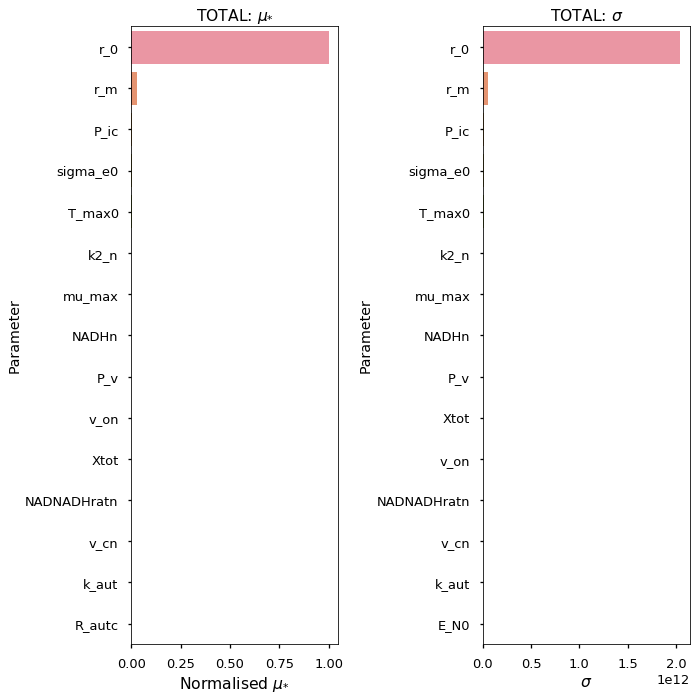

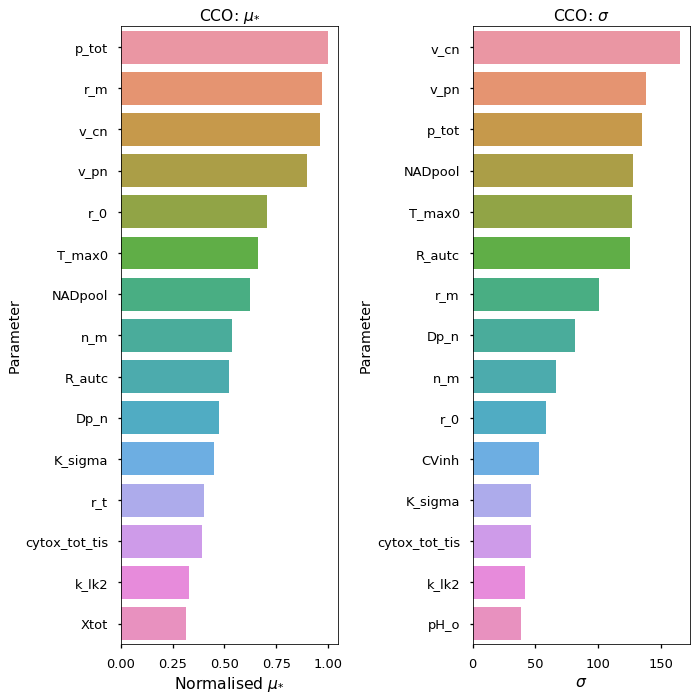

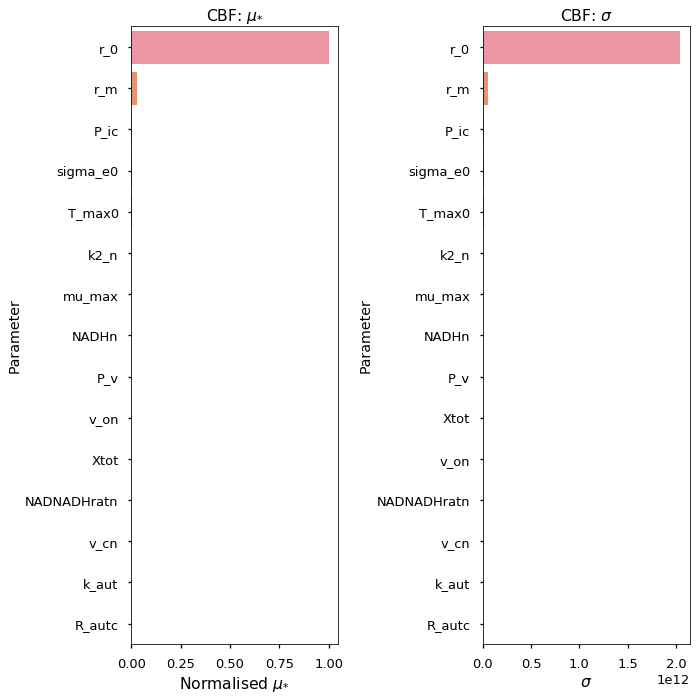

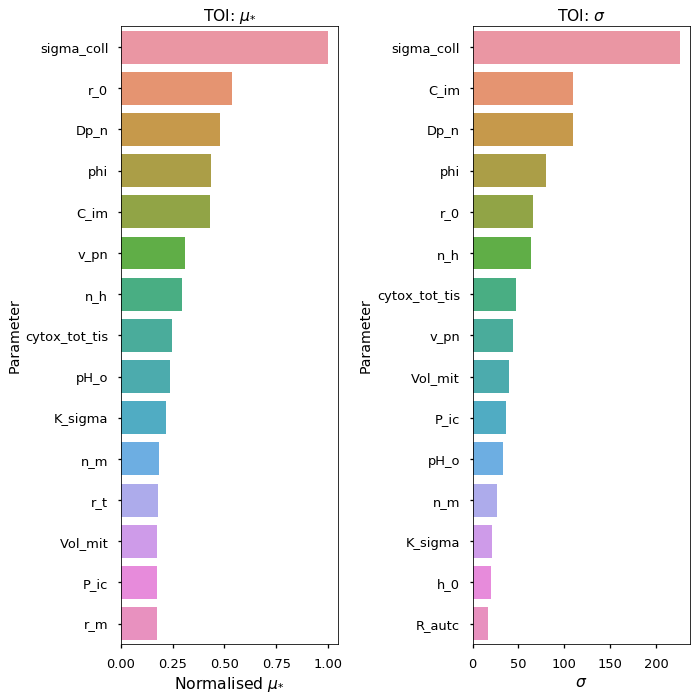

In [26]:
sens_params_healthy = {}
for o in ["TOTAL", "CCO", "CBF", "TOI"]:
    ax, df_norm, sens_p = sensitivity(df_healthy, o)
    sens_params_healthy[o] = list(sens_p)


## Sensitivities with variable k_aut with impaired data

In [11]:
df_impaired = pd.read_csv('multivar/wide/maxima/impaired/sensitivities.txt', sep='\t')

In [12]:
df_impaired.columns


Index(['Parameter', 'TOTAL_mu', 'TOTAL_mu_star', 'TOTAL_sigma',
       'TOTAL_mu_star_conf', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma',
       'CCO_mu_star_conf', 'TOI_mu', 'TOI_mu_star', 'TOI_sigma',
       'TOI_mu_star_conf', 'CBF_mu', 'CBF_mu_star', 'CBF_sigma',
       'CBF_mu_star_conf'],
      dtype='object')

In [13]:
df_impaired.sort_values(by="TOTAL_mu_star", ascending=False)

,Parameter,TOTAL_mu,TOTAL_mu_star,TOTAL_sigma,TOTAL_mu_star_conf,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf
110,v_un,-4.741222e+09,4.741223e+09,4.741222e+10,9.187660e+09,0.664258,1.265801,7.143299,1.323750,-290.397060,292.436407,2905.702251,543.172286,-4.741222e+09,4.741222e+09,4.741222e+10,9.183599e+09
107,v_cn,-4.741222e+09,4.741222e+09,4.741222e+10,9.175798e+09,0.645635,5.099760,15.880739,2.916604,28.403784,34.998117,304.709989,59.342984,-4.741222e+09,4.741222e+09,4.741222e+10,9.530314e+09
33,h_0,2.637857e+05,7.183946e+05,5.432203e+06,1.033644e+06,-1.124830,1.915245,13.753053,2.654088,0.291636,0.678257,3.679384,0.711391,2.637866e+05,7.183928e+05,5.432205e+06,1.049720e+06
89,r_m,2.273297e+05,2.273571e+05,2.273369e+06,4.632698e+05,0.647532,6.096179,23.092623,4.321648,-0.177061,1.409699,3.266540,0.561228,2.273293e+05,2.273499e+05,2.273368e+06,4.434876e+05
91,r_t,-2.436122e+03,2.545844e+03,2.481162e+04,4.892946e+03,-1.311278,10.533901,31.467320,5.920778,0.497478,3.678988,8.528455,1.519984,-2.435308e+03,2.533547e+03,2.481151e+04,4.825827e+03
85,R_auto,1.936502e+03,1.946865e+03,1.941006e+04,3.728314e+03,-2.804454,3.627447,21.543188,4.320283,-0.392008,0.679978,3.430894,0.675860,1.939698e+03,1.942682e+03,1.940972e+04,3.703531e+03
108,v_on,-4.749440e+01,1.034880e+03,7.153005e+03,1.390717e+03,-0.084703,2.494642,10.258879,1.929730,-1.110441,1.757624,10.014221,1.825411,-4.629925e+01,1.032800e+03,7.152773e+03,1.311660e+03
43,k_lk2,-3.987929e+02,5.308959e+02,4.691473e+03,9.309594e+02,0.324960,1.098213,2.690812,0.475045,0.438044,0.732649,2.930711,0.546176,-3.995559e+02,5.292402e+02,4.691452e+03,9.388579e+02
58,mu_max,2.930572e+02,2.995763e+02,2.912307e+03,5.637785e+02,3.766544,5.179348,27.413290,5.482807,291.148808,291.951240,2911.650867,541.755708,-1.858141e+00,2.641936e+00,1.296042e+01,2.555103e+00
87,R_autu,-2.890326e+02,2.935669e+02,2.912427e+03,5.770214e+02,-0.042719,0.141055,0.388727,0.070376,-291.162229,291.216578,2911.648406,565.211608,2.172395e+00,2.250960e+00,2.199061e+01,4.244513e+00


In [14]:
df_impaired.shape

(120, 17)

In [15]:
df_impaired.columns

Index(['Parameter', 'TOTAL_mu', 'TOTAL_mu_star', 'TOTAL_sigma',
       'TOTAL_mu_star_conf', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma',
       'CCO_mu_star_conf', 'TOI_mu', 'TOI_mu_star', 'TOI_sigma',
       'TOI_mu_star_conf', 'CBF_mu', 'CBF_mu_star', 'CBF_sigma',
       'CBF_mu_star_conf'],
      dtype='object')

In [16]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_impaired = df_impaired.query("Parameter!='{}'".format(p))
df_impaired.shape

(120, 17)

In [17]:
def sensitivity(df, output):
    param = (output+"_mu_star", output+"_sigma")
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param[0]].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param[0]: x_scaled.flatten()})
    df_mu = df_norm.sort_values(by=param[0], ascending=False)
    
    df_sigma = df.sort_values(by=param[1], ascending=False)
    with sns.plotting_context("talk"):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
        sns.barplot(x=param[0], y="Parameter", data=df_mu.head(15), ax=ax[0])
        sns.barplot(x=param[1], y="Parameter", data=df_sigma.head(15), ax=ax[1])
        ax[0].set_title(output + ": $\mu_{*}$")
        ax[1].set_title(output + ": $\sigma$")
        plt.tight_layout()
        plt.savefig('Figures/simulated/wide_params/impaired/multivar_max/{}.png'.format(param))
        plt.show()
        plt.close()
    sensitive_parameters = df_mu.head(15)['Parameter']
    
    return ax, df_norm, sensitive_parameters

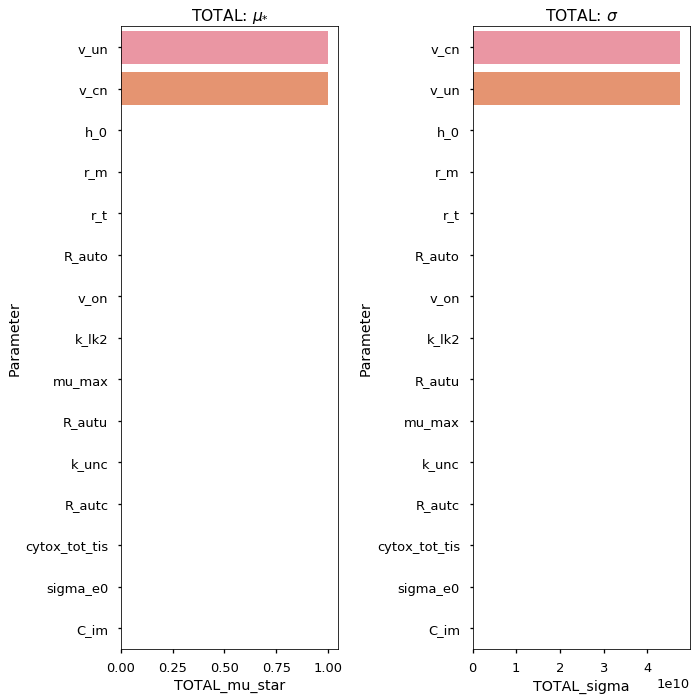

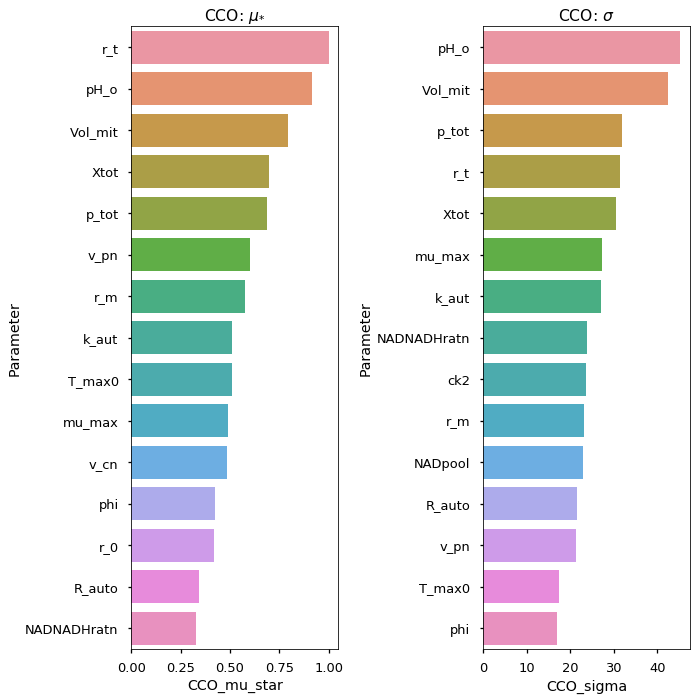

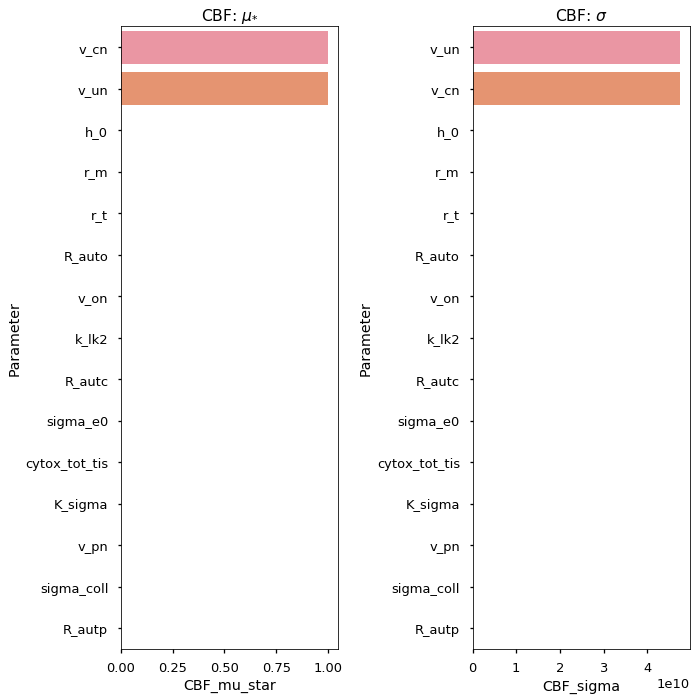

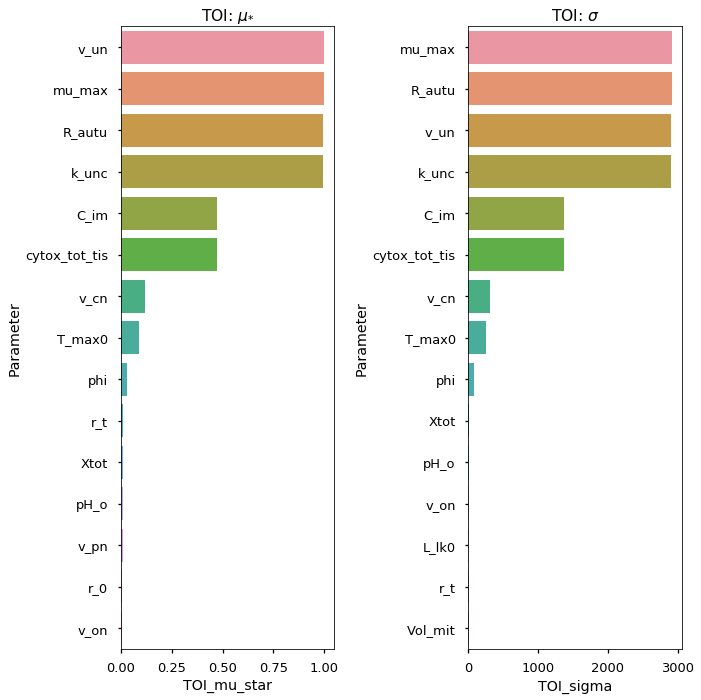

In [18]:
sens_params_impaired = {}
for o in ["TOTAL", "CCO", "CBF", "TOI"]:
    ax, df_norm, sens_p = sensitivity(df_impaired, o)
    sens_params_impaired[o] = list(sens_p)


## Comparing healthy and impaired

In [19]:
sens_params_healthy['TOTAL']

['r_0',
 'r_m',
 'P_ic',
 'sigma_e0',
 'T_max0',
 'k2_n',
 'mu_max',
 'NADHn',
 'P_v',
 'v_on',
 'Xtot',
 'NADNADHratn',
 'v_cn',
 'k_aut',
 'R_autc']

In [20]:
healthy = set(sens_params_healthy['TOTAL'])
impaired = set(sens_params_impaired['TOTAL'])

print(healthy.intersection(impaired))

{'mu_max', 'r_m', 'v_on', 'R_autc', 'sigma_e0', 'v_cn'}
